In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#changable parameters
target = "diagnosis"
test_size = 0.2


In [ ]:
df = pd.read_csv("data_arrhythmia.csv",sep=';')
df.dropna(axis=0, inplace=True)
df.drop(df.columns[20:-2],axis=1, inplace=True)
df.drop(['T','P','J','LG'],axis=1, inplace=True)
j = []
for i in df.diagnosis:
    if len(i) > 1 :
        j.append(1)
    else:
        j.append(0)
df.diagnosis = j
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,-2,63,0,52,44,0,0,0
1,56,1,165,64,81,174,401,149,39,25,31,53,0,48,0,0,0,0
2,54,0,172,95,138,163,386,185,102,96,66,75,0,40,80,0,0,1
3,55,0,175,94,100,202,380,179,143,28,20,71,0,72,20,0,0,0
4,75,0,190,80,88,181,360,177,103,-16,3,?,0,48,40,0,0,0


In [ ]:
#classification or regression
if (type(df[target][0]) == str) or (type(df[target][0]) == int) or (type(df[target][0]) == np.int64):
    models_type = 'classification'
else:
    models_type = 'regression'
print(models_type)

classification


In [ ]:
def label_encoding(old_column):
    le = LabelEncoder()
    le.fit(old_column)
    new_column = le.transform(old_column)
    return new_column

In [ ]:
#encoding string parameters
for i in df.columns:
    if type(df[i][0]) == str:
        df[i] = label_encoding(df[i])

In [ ]:
#extracting x and y
y = df[target].values
x = df.drop([target], axis=1).values

In [ ]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,67,0,50,58,58,80,69,58,21,9,11,29,0,17,9,0,0,0
1,47,1,28,42,48,64,98,33,42,84,69,19,0,16,0,0,0,0
2,45,0,35,72,21,53,84,69,3,159,106,41,0,14,18,0,0,1
3,46,0,38,71,0,89,78,63,30,87,57,37,0,22,3,0,0,0
4,67,0,50,58,55,70,58,61,4,9,67,63,0,16,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,44,1,23,48,47,86,80,38,18,27,14,29,0,17,4,0,0,0
901,28,0,50,63,0,27,59,83,63,150,120,39,0,15,7,0,0,1
902,27,0,29,46,8,66,63,77,17,52,32,50,2,14,8,0,0,0
903,23,1,18,32,60,3,84,91,53,116,82,46,0,18,0,0,0,0


In [ ]:
#spliting  data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size)

In [ ]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs', 'QRST', 'heart_rate',
       'q_wave', 'r_wave', 's_wave', 'R'_wave', 'S'_wave', 'diagnosis'],
      dtype='object')

In [ ]:
#ensemble models for classification

if models_type == 'classification':
    model_2 = XGBClassifier(eval_metric='mlogloss')
    params = {  "n_estimators": st.randint(3, 40),
                "max_depth": st.randint(3, 40),
                "learning_rate": st.uniform(0.05, 0.4),
                "colsample_bytree": st.beta(10, 1),
                "subsample": st.beta(10, 1),
                "gamma": st.uniform(0, 10),
                'objective': ['binary:logistic'],
                'scale_pos_weight': st.randint(0, 2),
                "min_child_weight": st.expon(0, 50),}

    # Random Search Training with 5 folds Cross Validation
    clf1 = RandomizedSearchCV(model_2, params, cv=5,n_jobs=1, n_iter=100)
    clf1.fit(X_train, y_train)
    pred_final = clf1.predict(X_test)
    print("accuracy is: ",accuracy_score(y_test, pred_final))
    #save models
    filename = 'clf1.pkl'
    pickle.dump(clf1, open(filename, 'wb'))
    print(clf1.best_params_)

accuracy is:  0.9226519337016574
{'colsample_bytree': 0.9765648770947526, 'gamma': 0.4848596029387664, 'learning_rate': 0.1787521304134731, 'max_depth': 34, 'min_child_weight': 2.5454579335531546, 'n_estimators': 25, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'subsample': 0.8322534322684184}


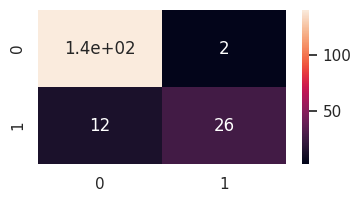

In [ ]:
#confusion matrix plot
if models_type == 'classification':
    cm = confusion_matrix(y_test, pred_final)
    sns.set(rc={"figure.figsize":(4, 2)})
    sns.heatmap(cm, annot=True)

In [ ]:
model = pickle.load(open('clf1.pkl', 'rb'))

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(old_column):
    le = LabelEncoder()
    le.fit(old_column)
    new_column = le.transform(old_column)
    return new_column

In [ ]:
df = [75, 0, 190, 80, 91, 193, 371, 174, 121, -16, -2, 63, 0, 52, 44, 0,0]
dfs = label_encoding(df)

# Assuming model is a trained machine learning model
clf = model.predict([dfs])

if clf == 0.0:
    output = 'Patient has no Heart disease'
elif clf == 1.0:
    output = 'Patient has Heart disease'
else:
    output = 'Unknown classification'

print(output)

Patient has no Heart disease
